<a href="https://colab.research.google.com/github/saurabhbarge/tweeteval/blob/main/HatesSpeech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the Libraries**

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import string
from wordcloud import WordCloud
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**Reading the Hate Dataset Training Text file and Training Labels file**

In [3]:
with open("/content/drive/MyDrive/hate/train_text.txt") as data:
    traintext = data.read()

In [4]:
with open('/content/drive/MyDrive/hate/train_labels.txt') as labels:
    trainlabels = labels.read()

In [5]:
trainlabels

'0\n1\n1\n1\n0\n0\n0\n1\n0\n1\n1\n0\n1\n0\n0\n1\n0\n0\n1\n1\n1\n1\n1\n0\n0\n1\n0\n0\n0\n1\n1\n0\n0\n0\n0\n0\n0\n0\n0\n0\n1\n1\n0\n0\n0\n1\n0\n1\n1\n1\n1\n1\n1\n1\n0\n0\n0\n1\n0\n1\n0\n0\n1\n1\n0\n0\n0\n1\n0\n1\n0\n0\n0\n1\n1\n0\n1\n1\n1\n1\n0\n1\n1\n0\n1\n0\n0\n1\n0\n0\n1\n1\n0\n1\n1\n0\n0\n1\n1\n0\n1\n0\n0\n0\n0\n0\n0\n1\n1\n1\n0\n1\n1\n1\n1\n1\n0\n1\n0\n0\n0\n1\n0\n0\n0\n0\n0\n1\n0\n1\n0\n0\n0\n1\n1\n0\n1\n1\n1\n0\n0\n1\n1\n0\n0\n1\n1\n1\n1\n0\n1\n0\n0\n0\n0\n0\n1\n1\n1\n1\n0\n0\n1\n0\n0\n0\n1\n0\n1\n0\n1\n0\n0\n1\n0\n1\n0\n1\n0\n1\n1\n0\n0\n0\n1\n1\n0\n0\n1\n0\n1\n1\n1\n0\n0\n0\n0\n0\n0\n0\n1\n0\n0\n1\n0\n1\n0\n1\n1\n0\n1\n0\n1\n0\n0\n0\n0\n0\n0\n1\n0\n1\n1\n0\n0\n1\n1\n0\n1\n1\n0\n1\n1\n0\n1\n0\n0\n1\n0\n0\n0\n0\n0\n1\n0\n0\n1\n0\n0\n0\n1\n1\n0\n0\n0\n1\n0\n0\n0\n1\n0\n0\n0\n0\n0\n0\n1\n0\n0\n0\n1\n0\n0\n1\n0\n0\n0\n1\n1\n1\n1\n1\n0\n1\n0\n0\n1\n0\n0\n1\n0\n1\n0\n1\n0\n0\n0\n1\n1\n0\n0\n0\n1\n1\n0\n1\n0\n1\n1\n0\n1\n0\n1\n1\n1\n1\n0\n0\n0\n0\n0\n1\n0\n0\n0\n0\n0\n1\n1\n0\n1\n1\n0\n

In [6]:
traintext

'@user nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you… \nA woman who you fucked multiple times saying yo dick small is a compliment you know u hit that spot 😎 \n@user @user real talk do you have eyes or were they gouged out by a rapefugee? \nyour girlfriend lookin at me like a groupie in this bitch! \nHysterical woman like @user \nMe flirting- So tell me about your father... \nThe Philippine Catholic bishops\' work for migrant workers should focus on families who are "paying the great... \nI AM NOT GOING AFTER YOUR EX BF YOU LIEING SACK OF SHIT ! I\'m done with you dude that\'s why I dumped your ass cause your a lieing 😂😡 bitch \nWhen cuffin season is finally over \nSend home migrants not in need of protection, Peter Dutton tells UN, HEY DUTTON HOW ABOUT THE ONES THAT HAVE STAYED AND NOT LEFT THE COUNTRY WHEN THEY SHOULD OVERSTAYERS ? WHY DONT YOU GO AND ROUND ALL THEM UP ?  \nCory Booker and Kamala Harris competing for Most Hysteri

In [7]:
stop_words = list(set(stopwords.words('english'))) # list of stop words

In [8]:
ht_traintext = traintext.split('\n')

In [9]:
ht_trainlabels = trainlabels.split('\n')

**Converting all characters to lower case**

In [10]:
ht_traintext = [x.lower() for x in ht_traintext]

In [11]:
df_hate = pd.DataFrame({"Hate_Text":ht_traintext ,"Hate_labels":ht_trainlabels})

**Mapping Labels**

In [12]:
df_hate['Hate_labels'] = df_hate['Hate_labels'].map({'0': 'not-hate', '1': 'hate'})

In [13]:
df_hate.head()

,Hate_Text,Hate_labels
0,@user nice new signage. are you not concerned ...,not-hate
1,a woman who you fucked multiple times saying y...,hate
2,@user @user real talk do you have eyes or were...,hate
3,your girlfriend lookin at me like a groupie in...,hate
4,hysterical woman like @user,not-hate


In [14]:
stemmer = PorterStemmer() # creating stemmer object

In [15]:
lemmatizer = WordNetLemmatizer() # creating lemmatizer object

**Pre-processing Function includes the following:**
**-removes punctuations**
**,removes digits**
**,removes word 'user' which is frequently used in the datasets**
**,removes stopwords**
**,performed stemming**
**,performed lemmatization**

In [16]:
def pre_processing(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub('user','',text)
    text = ' '.join([x for x in word_tokenize(text) if x not in stop_words])
    text = ' '.join([stemmer.stem(x) for x in word_tokenize(text)])
    text = ' '.join([lemmatizer.lemmatize(x) for x in word_tokenize(text)])
    return text

**Function for removing Emojis**

In [17]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [18]:
df_hate['Hate_Text'] = df_hate['Hate_Text'].apply(lambda x: pre_processing(x))

In [19]:
df_hate['Hate_Text'] = df_hate['Hate_Text'].apply(lambda x:remove_emoji(x))

**Cleaned Text**

In [20]:
df_hate.head()

,Hate_Text,Hate_labels
0,nice new signag concern beatlemania style hyst...,not-hate
1,woman fuck multipl time say yo dick small comp...,hate
2,real talk eye goug rapefuge,hate
3,girlfriend lookin like groupi bitch,hate
4,hyster woman like,not-hate


In [21]:
df_hate.shape 

(9001, 2)

**Checking the count of Labels**

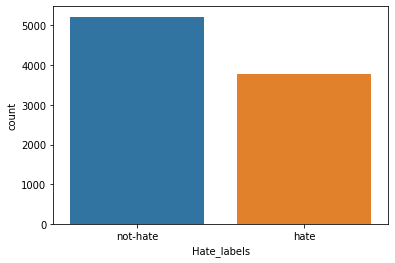

In [22]:
sns.countplot(x="Hate_labels", data=df_hate)

**Checking for Missing Values**

In [23]:
df_hate.isna().sum()

Hate_Text      0
Hate_labels    1
dtype: int64

**Using CountVectorizer and TF-IDF Vectorizer for translating text data into numeric form acceptable by the model**

In [24]:
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(df_hate['Hate_Text'])

In [25]:
cv_train_features

<9001x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 87605 stored elements in Compressed Sparse Row format>

In [26]:
tf = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tf_train_features = tf.fit_transform(df_hate['Hate_Text'])

In [27]:
tf_train_features

<9001x88661 sparse matrix of type '<class 'numpy.float64'>'
	with 194743 stored elements in Compressed Sparse Row format>

In [28]:
print('Bag of Words model:Train features shape:', cv_train_features.shape)
print('TFIDF model:> Train features shape:', tf_train_features.shape)

BOW model:> Train features shape: (9001, 10000)
TFIDF model:> Train features shape: (9001, 88661)


**WORD CLOUD**

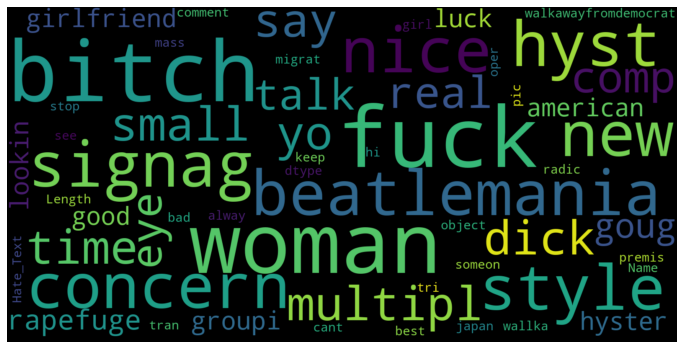

In [29]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(df_hate['Hate_Text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()